### 0.1 READ SAFELY THE DATA SOURCE

In [50]:
import configparser

# Initiate the configparser
config = configparser.ConfigParser()

# Read the config ini file
config.read('config.ini')

# Access the file path
csv_file_path = config['path']['indian_marrige']

### 0.2 DEFINE HTML DISPLAY

In [51]:
from IPython.display import display, HTML
import pandas as pd

# Define the CSS that will make the table scrollable
css = """
.output {
    max-height: 500px; /* Adjust as needed */
    overflow: scroll;  /* Allows scrolling */
}
"""

# Apply the CSS for scrollable output
display(HTML('<style>{}</style>'.format(css)))

# Configure pandas display options for better visuals
pd.set_option('display.max_rows', None)  # Display all rows, adjust as needed
pd.set_option('display.max_columns', None)  # Display all columns, adjust as needed
pd.set_option('display.max_colwidth', 90)  # Set max column width for long text
pd.options.display.float_format = '{:,.2f}'.format  # Format floating-point numbers

___________________
### 1. DATA EXPOSURE 

In [52]:
# Read the csv file and clean the specified fields
indian_marriage = pd.read_csv(csv_file_path, encoding='UTF-8-SIG')

# Function to display table
def display_table(df, title):
    shape_info = f"<div><b>shape:</b>{df.shape}</div>"
    summary_stats = df.describe().to_html()

# Display title and table
    display(HTML(f"<h2>{title}</h2>"))
    display(HTML(shape_info))
    display(HTML(f"<div><b>Summary Statistics:</b></div>"))
    display(HTML(summary_stats))
    display(HTML (f"<div<b>Complete Dataset<b></div>"))
    display(HTML(df.to_html(index=False)))

# Display the dataset in a table format
display_table(indian_marrige, 'INDIAN MARRIGE DATASET')

______________
### 3. DATA MANIPULATION TO INSIGHT EXTRACTION

#### 3.1 MARRIAGE TYPE PERCENTAGE ACROSS DEMOGRAPHICS

In [17]:
# Step 1: Calculate the percentage distribution of marriage types across demographics
def calculate_percentage_distribution(df,group_col, marriage_col='Marriage_Type'):
    """
    Calculate the percentage distribution of marriage types for a given demographic column.
    """
    # Group by the demographic column and marriage type, then calculate percentages
    distribution = df.groupby([group_col, marriage_col]).size().unstack(fill_value=0)
    distribution = distribution.div(distribution.sum(axis=1),axis=0)*100
    return distribution.round(2)

# Step 2: Calculate the distribution for all demographics
gender_distribution = calculate_percentage_distribution(indian_marriage, 'Gender')
education_distribution = calculate_percentage_distribution(indian_marriage,'Education_Level')
urban_rural_distribution = calculate_percentage_distribution(indian_marriage, 'Urban_Rural')

# Step 3: Combine all distribution into a single table
combined_distribution = pd.concat([gender_distribution,education_distribution,urban_rural_distribution],
                                  keys=['Gender','Education Level', 'Urban Rural'])

# Step 4: Display the table
display(HTML(combined_distribution.to_html()))

#### 3.2 MEAN AGE MARRIAGE BY GENDER AND ACROSS DEMOGRAPHICS

In [ ]:
# Step 1: Group the data and calculate mean age at marriage
grouped_data = indian_marriage.groupby(['Gender', 'Education_Level', 'Urban_Rural'])['Age_at_Marriage'].mean().reset_index()
grouped_data = grouped_data.rename(columns={'Age_at_Marriage': 'Mean_Age_at_Marriage'})

# step 2: Display the grouped data in a clean table format
display(HTML(grouped_data.to_html(index=False)))

### 4. DATA VISUALIZATION

#### 4.1 ANALYZING AGE AT MARRIAGE BY DEMOGRAPHICS

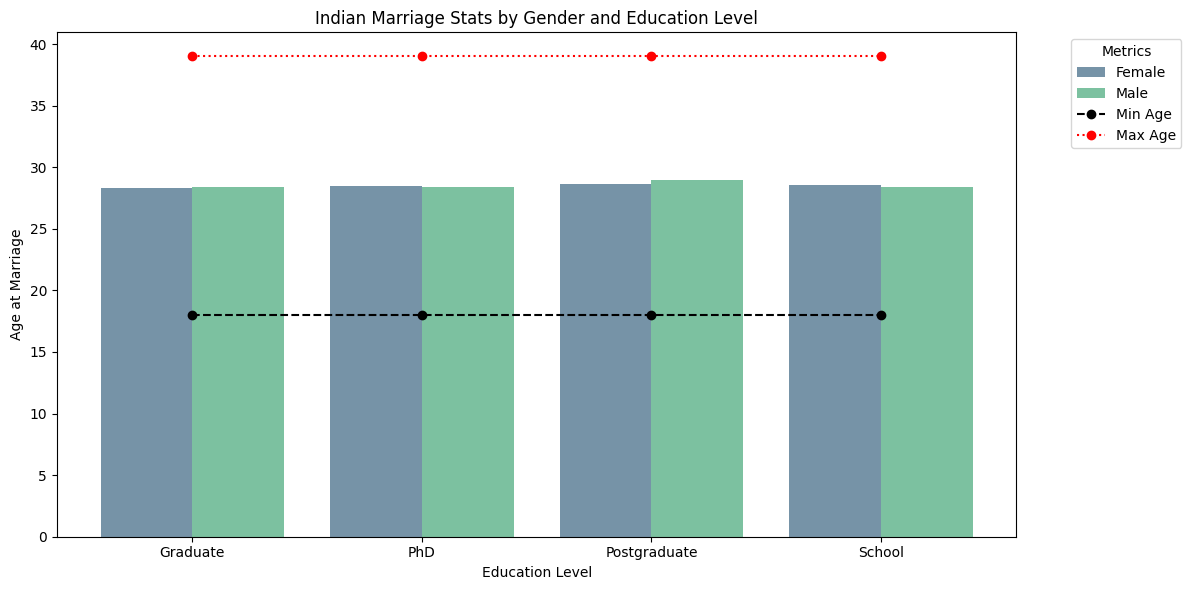

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# Step 1: Calculate min, max, and mean age at marriage
# Mean values grouped by Gender and Education Level
grouped_mean = indian_marriage.groupby(['Gender', 'Education_Level'])['Age_at_Marriage'].mean().reset_index()

# Min and max values grouped by Education Level (aggregated across genders)
grouped_min_max = indian_marriage.groupby('Education_Level')['Age_at_Marriage'].agg(['min', 'max']).reset_index()

# Step 2: Visualize the results using a bar plot with overlaid lines
plt.figure(figsize=(12, 6))

# Bar plot for mean age at marriage (separated by gender)
sns.barplot(
    x='Education_Level',
    y='Age_at_Marriage',
    hue='Gender',
    data=grouped_mean,
    palette='viridis',
    dodge=True,  # Separate bars for different hues
    alpha=0.7  # Slightly transparent bars
)

# Line plot for min and max age at marriage (aggregated across genders)
plt.plot(
    grouped_min_max['Education_Level'],
    grouped_min_max['min'],
    marker='o',  # Add markers for min values
    linestyle='--',  # Dashed line for min
    color='black',  # Color for min line
    label='Min Age'
)
plt.plot(
    grouped_min_max['Education_Level'],
    grouped_min_max['max'],
    marker='o',  # Add markers for max values
    linestyle=':',  # Dotted line for max
    color='red',  # Color for max line
    label='Max Age'
)

plt.title('Indian Marriage Stats by Gender and Education Level')
plt.xlabel('Education Level')
plt.ylabel('Age at Marriage')
plt.legend(title='Metrics', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside the plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()
